## The purpose of this MVP is to show Basic Data cleaning and visualization

## The data that we will be working with regard sales of a store to try to predict the sales, but in this MVP we want to understand the customer behavior>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
import math

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Dalsallum/T5-bootcamp/Project-files/Train-Set.csv')
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

## filling the missing values:

### before we filled the values straight forward, let us now try a better way

In [5]:
df1 = df.copy()

### first the weight column, since every product has an id. we can get a dict of all Product ID's and their weight.
### when a value is missing we will look in the product ID dict to find the correct weight. if there are none we can fill it with the mean .

In [6]:
weight_dict = {}
for x in range(len(df1['Weight'])):
    if  math.isnan(df1['Weight'][x]) is False:
        weight_dict[df1['ProductID'][x]] = df1['Weight'][x]
# after having a dict of the weights, lets fill the missing values with it.
len(weight_dict)

1555

In [7]:
for x in range(len(df1['Weight'])):
    if  math.isnan(df1['Weight'][x]):
        if df1['ProductID'][x] in weight_dict:
            df1['Weight'][x] = weight_dict[df1['ProductID'][x]]

<ipython-input-7-4f11cbcef5f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weight'][x] = weight_dict[df1['ProductID'][x]]


In [8]:
weight_dict

{'FDA15': 9.3,
 'DRC01': 5.92,
 'FDN15': 17.5,
 'FDX07': 19.2,
 'NCD19': 8.93,
 'FDP36': 10.395,
 'FDO10': 13.65,
 'FDH17': 16.2,
 'FDU28': 19.2,
 'FDY07': 11.8,
 'FDA03': 18.5,
 'FDX32': 15.1,
 'FDS46': 17.6,
 'FDF32': 16.35,
 'FDP49': 9.0,
 'NCB42': 11.8,
 'FDU02': 13.35,
 'FDN22': 18.85,
 'NCB30': 14.6,
 'FDR28': 13.85,
 'NCD06': 13.0,
 'FDV10': 7.645,
 'DRJ59': 11.65,
 'FDE51': 5.925,
 'FDV38': 19.25,
 'NCS17': 18.6,
 'FDP33': 18.7,
 'FDO23': 17.85,
 'DRH01': 17.5,
 'NCX29': 10.0,
 'DRZ11': 8.85,
 'FDK43': 9.8,
 'FDA46': 13.6,
 'FDC02': 21.35,
 'FDL50': 12.15,
 'FDM39': 6.42,
 'NCP05': 19.6,
 'FDV49': 10.0,
 'FDL12': 15.85,
 'NCL17': 7.39,
 'FDM40': 10.195,
 'FDR13': 9.895,
 'FDA43': 10.895,
 'NCP18': 12.15,
 'FDK21': 7.905,
 'NCX54': 9.195,
 'DRK35': 8.365,
 'FDY21': 15.1,
 'FDM20': 10.0,
 'FDV27': 7.97,
 'FDC46': 17.7,
 'FDH19': 19.35,
 'FDZ03': 13.65,
 'DRH37': 17.6,
 'NCI17': 8.645,
 'FDJ58': 15.6,
 'FDH35': 18.25,
 'FDG02': 7.855,
 'NCZ18': 7.825,
 'FDC29': 8.39,
 'FDQ10': 12.

## As can be seen, we have filled the values. We can do the same with the outlet size

In [9]:
size_dict = {}
counter = 0
for x in range(len(df1['OutletSize'])):
    if  type(df1['OutletSize'][x]) is not float:
        size_dict[df1['OutletID'][x]] = df1['OutletSize'][x]
    

In [10]:
for x in range(len(df1['OutletSize'])):
    if  type(df1['OutletSize'][x]) is float:
        if df1['OutletID'][x] in size_dict :
            df1['OutletSize'][x] = size_dict[df1['OutletID'][x]]

In [11]:
size_dict

{'OUT049': 'Medium',
 'OUT018': 'Medium',
 'OUT013': 'High',
 'OUT027': 'Medium',
 'OUT046': 'Small',
 'OUT035': 'Small',
 'OUT019': 'Small'}

## this approach won't work, since the we don't have any information about the missing outlets, we can do simple fill

In [12]:
df1['OutletSize'] = df['OutletSize'].replace(np.nan, 'Medium')

df1.isna().sum()

ProductID            0
Weight               4
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [13]:
df1 = df1.dropna()
df1.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [14]:
df1.ProductVisibility.value_counts()

0.000000    526
0.076975      3
0.072655      2
0.187841      2
0.107224      2
           ... 
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.050902      1
Name: ProductVisibility, Length: 7876, dtype: int64

In [15]:
# there are many zeros here, we can drop this column
df1 = df1.drop(['ProductVisibility'], axis = 1)


In [16]:
df1

,ProductID,Weight,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976



### Let's first understand the coloumns of this dataframe .

#### ProductID : unique product ID
#### Weight : weight of products
#### FatContent : specifies whether the product is low on fat or not
#### Visibility : percentage of total display area of all products in a store allocated to the particular product
#### ProductType : the category to which the product belongs
#### MRP : Maximum Retail Price (listed price) of the products
#### OutletID : unique store ID
#### EstablishmentYear : year of establishment of the outlets
#### OutletSize : the size of the store in terms of ground area covered
#### LocationType : the type of city in which the store is located
#### OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket
#### OutletSales : (target variable) sales of the product in the particular store
####

In [17]:
# data cleaning

In [18]:
df1.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [19]:
df1.duplicated().sum()

0

### initial data cleaning is done, let's do visualization to understand the customer behavior and how can the stores improve

In [20]:
outlet_id_df1 = df1.groupby(['OutletID','OutletSize']).sum()
outlet_id_df1.reset_index(inplace=True)
outlet_id_df1 = outlet_id_df1.sort_values(by='OutletSales')
outlet_id_df1

,OutletID,OutletSize,Weight,MRP,EstablishmentYear,OutletSales
4,OUT019,Small,6855.745,73686.3726,1046095,1.795736e+05
0,OUT010,Medium,7166.800,78131.5646,1108890,1.883402e+05
3,OUT018,Medium,11946.465,131477.7724,1864352,1.851823e+06
7,OUT045,Medium,11751.840,130942.7782,1859858,2.036725e+06
8,OUT046,Small,11966.125,132113.3698,1857210,2.118395e+06
1,OUT013,High,12121.730,131809.0156,1851884,2.142664e+06
2,OUT017,Medium,11877.495,129103.9564,1858482,2.167465e+06
9,OUT049,Medium,12013.225,130476.8598,1859070,2.183970e+06
6,OUT035,Small,11931.295,133103.9070,1863720,2.268123e+06
5,OUT027,Medium,12054.985,130418.7594,1850020,3.444468e+06


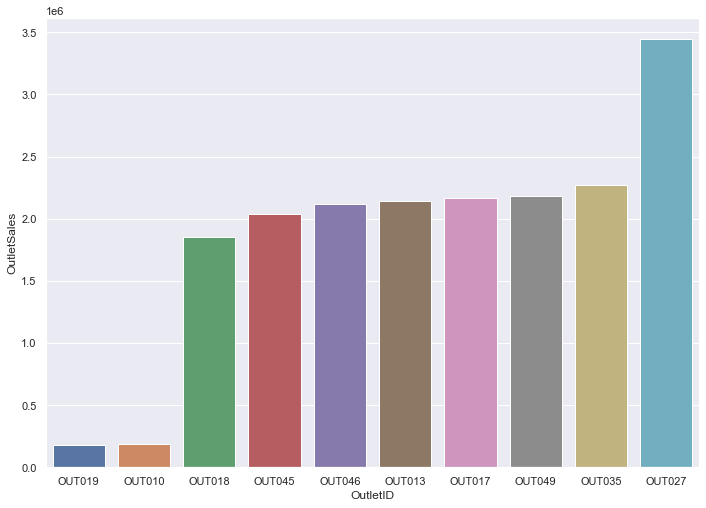

In [21]:
# will start by seeing which store had the most sales, from the outlet ID column
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df1);

### from the figure it is clear OUT027 had the most sales, but the stores are different sizes.
### Lets see how the outlet size make a difference


<AxesSubplot:xlabel='OutletID', ylabel='OutletSales'>

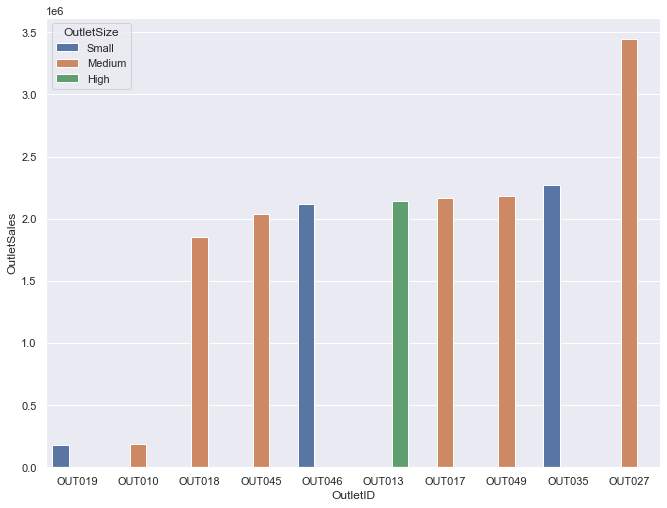

In [22]:
sns.set(rc={'figure.figsize':(11,8.27)})

sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df1,hue='OutletSize')

## we can see here that OUT027  is meaduim size store yet it had more sales than OUT013 which is large store.
## yet this result can be explained since we filled null values with the mode, better filling of the data can show something different 
## lets assume this is the case and try to understand why this store has more sales than other.
## big questions like : 

### - Does the Establishment Year matter ? 
### - Does this store has more low/high fat products than others ?
### - Location type?

In [23]:
outlet_id_df2 = df1.groupby(['OutletID','EstablishmentYear']).sum()
outlet_id_df2.reset_index(inplace=True)
outlet_id_df2 = outlet_id_df2.sort_values(by='OutletSales')
outlet_id_df2

,OutletID,EstablishmentYear,Weight,MRP,OutletSales
4,OUT019,1985,6855.745,73686.3726,1.795736e+05
0,OUT010,1998,7166.800,78131.5646,1.883402e+05
3,OUT018,2009,11946.465,131477.7724,1.851823e+06
7,OUT045,2002,11751.840,130942.7782,2.036725e+06
8,OUT046,1997,11966.125,132113.3698,2.118395e+06
1,OUT013,1987,12121.730,131809.0156,2.142664e+06
2,OUT017,2007,11877.495,129103.9564,2.167465e+06
9,OUT049,1999,12013.225,130476.8598,2.183970e+06
6,OUT035,2004,11931.295,133103.9070,2.268123e+06
5,OUT027,1985,12054.985,130418.7594,3.444468e+06


<AxesSubplot:xlabel='OutletID', ylabel='OutletSales'>

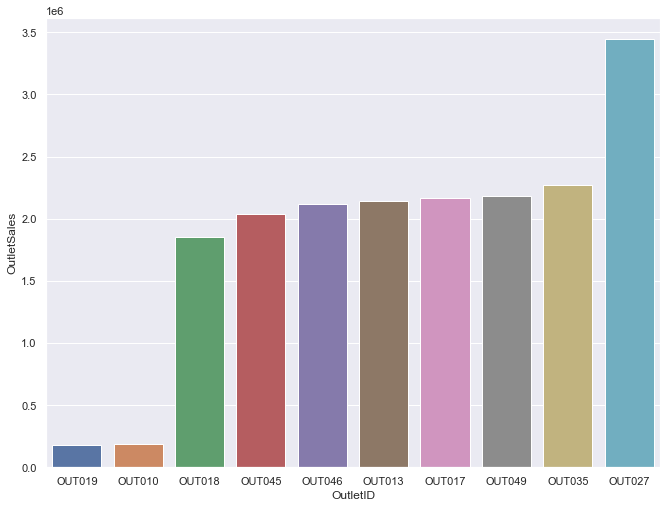

In [24]:
sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df2,ci= None)

<AxesSubplot:xlabel='OutletID', ylabel='OutletSales'>

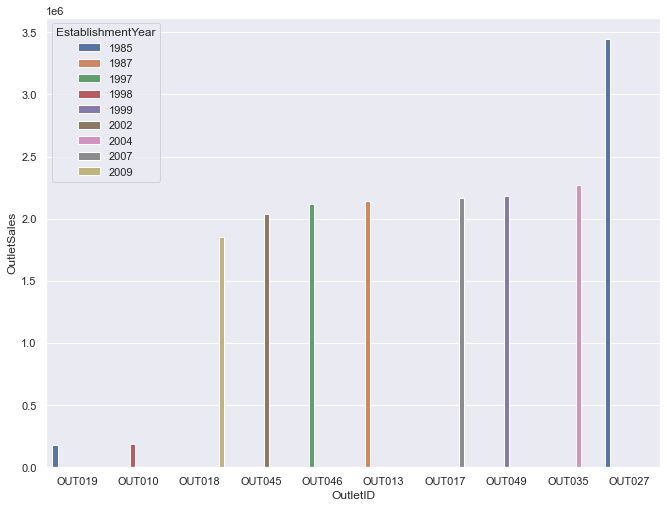

In [25]:
sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df2,ci= None,hue='EstablishmentYear')

### Olders outlet has the biggest sales, but that doesn't mean old is more famous and better.
### other relatively new outlets are doing better than other older outlets.

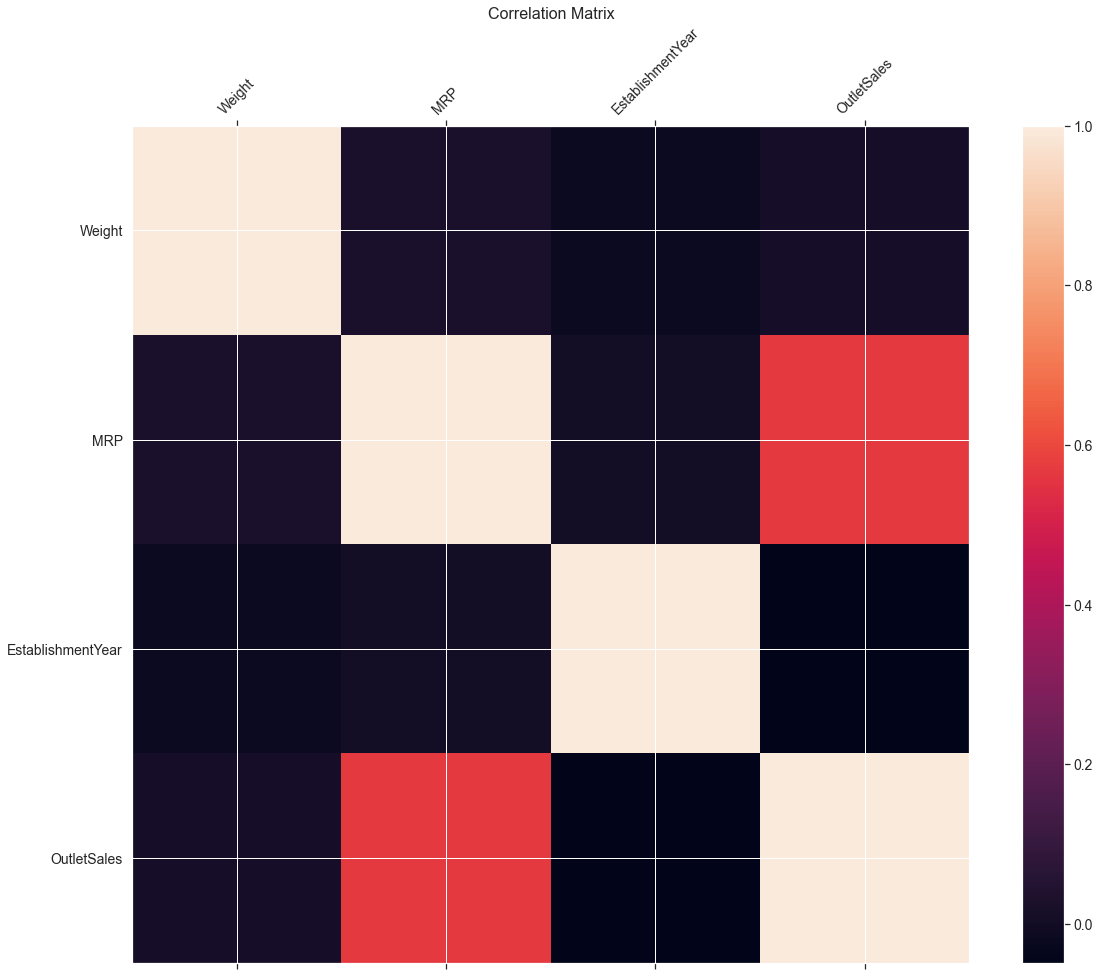

In [26]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [27]:
df1

,ProductID,Weight,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='ProductType', ylabel='count'>

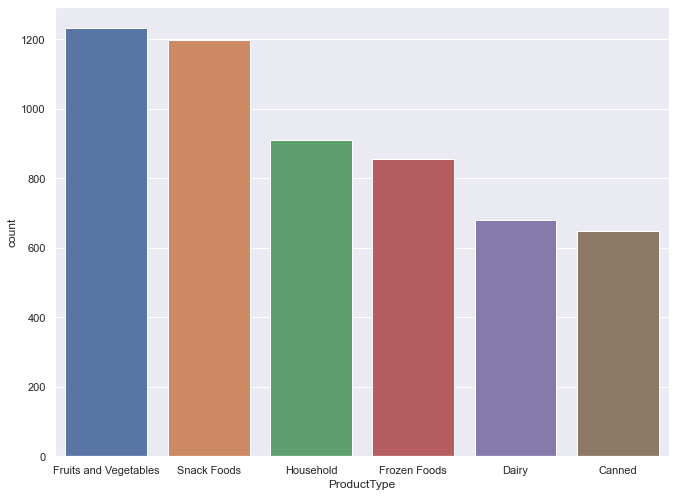

In [28]:
f
sns.countplot(x='ProductType', data=df1,order=pd.value_counts(df1['ProductType']).iloc[:6].index)

<AxesSubplot:xlabel='OutletType', ylabel='count'>

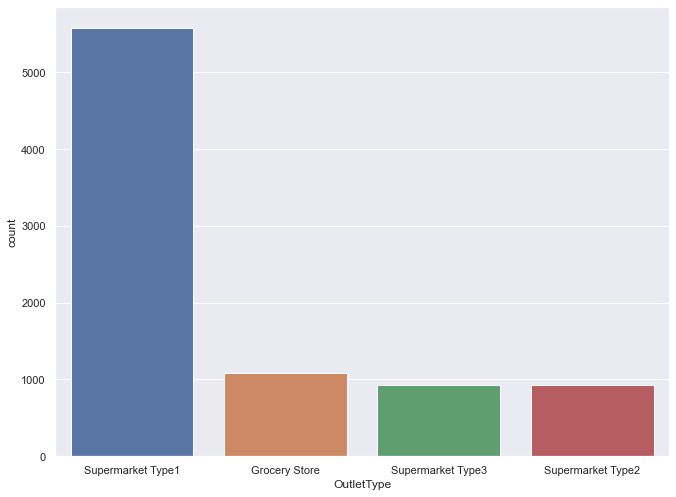

In [29]:

sns.countplot(x=df1['OutletType'],order = df1['OutletType'].value_counts().index)

<AxesSubplot:xlabel='LocationType', ylabel='count'>

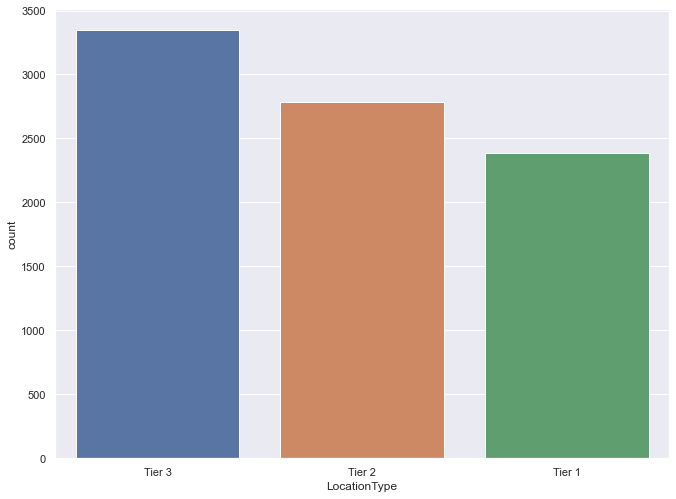

In [30]:
sns.countplot(x=df1['LocationType'],order = df1['LocationType'].value_counts().index)

In [31]:
df1

,ProductID,Weight,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [32]:
# pre processing

from sklearn import preprocessing
df1 = df1.drop(['ProductID','OutletID'],axis=1)
x = df1.drop('OutletSales',axis=1)
y = df1['OutletSales']

In [33]:
df1

,Weight,FatContent,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.300,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [34]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [35]:
x_d = pd.get_dummies(x)
x_d

,Weight,MRP,EstablishmentYear,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,FatContent_reg,ProductType_Baking Goods,ProductType_Breads,...,OutletSize_High,OutletSize_Medium,OutletSize_Small,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,9.300,249.8092,1999,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,48.2692,2009,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,141.6180,1999,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,182.0950,1998,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,53.8614,1987,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,1987,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,108.1570,2002,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,2004,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,103.1332,2009,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [36]:
from sklearn import preprocessing
normalized_x=(x_d-x_d.mean())/x_d.std()
normalized_x

,Weight,MRP,EstablishmentYear,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,FatContent_reg,ProductType_Baking Goods,ProductType_Breads,...,OutletSize_High,OutletSize_Medium,OutletSize_Small,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,-0.769553,1.746835,0.138857,-0.19626,0.821129,-0.715736,-0.115415,-0.117998,-0.286671,-0.174225,...,-0.350467,0.798871,-0.623878,1.602689,-0.696880,-0.804402,-0.381408,0.726266,-0.349622,-0.350467
1,-1.497045,-1.489009,1.333728,-0.19626,-1.217693,1.396999,-0.115415,-0.117998,-0.286671,-0.174225,...,-0.350467,0.798871,-0.623878,-0.623878,-0.696880,1.243014,-0.381408,-1.376745,2.859895,-0.350467
2,0.995368,0.009761,0.138857,-0.19626,0.821129,-0.715736,-0.115415,-0.117998,-0.286671,-0.174225,...,-0.350467,0.798871,-0.623878,1.602689,-0.696880,-0.804402,-0.381408,0.726266,-0.349622,-0.350467
3,1.361267,0.659644,0.019370,-0.19626,-1.217693,1.396999,-0.115415,-0.117998,-0.286671,-0.174225,...,-0.350467,0.798871,-0.623878,-0.623878,-0.696880,1.243014,2.621560,-1.376745,-0.349622,-0.350467
4,-0.849190,-1.399223,-1.294988,-0.19626,0.821129,-0.715736,-0.115415,-0.117998,-0.286671,-0.174225,...,2.852999,-1.251620,-0.623878,-0.623878,-0.696880,1.243014,-0.381408,0.726266,-0.349622,-0.350467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.293649,1.180275,-1.294988,-0.19626,0.821129,-0.715736,-0.115415,-0.117998,-0.286671,-0.174225,...,2.852999,-1.251620,-0.623878,-0.623878,-0.696880,1.243014,-0.381408,0.726266,-0.349622,-0.350467
8519,-0.967569,-0.527475,0.497318,-0.19626,-1.217693,1.396999,-0.115415,-0.117998,3.487907,-0.174225,...,-0.350467,0.798871,-0.623878,-0.623878,1.434798,-0.804402,-0.381408,0.726266,-0.349622,-0.350467
8520,-0.489749,-0.897309,0.736292,-0.19626,0.821129,-0.715736,-0.115415,-0.117998,-0.286671,-0.174225,...,-0.350467,-1.251620,1.602689,-0.623878,1.434798,-0.804402,-0.381408,0.726266,-0.349622,-0.350467
8521,-1.219393,-0.608135,1.333728,-0.19626,-1.217693,1.396999,-0.115415,-0.117998,-0.286671,-0.174225,...,-0.350467,0.798871,-0.623878,-0.623878,-0.696880,1.243014,-0.381408,-1.376745,2.859895,-0.350467


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import datasets, linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
lasso = linear_model.Lasso()
scores = cross_val_score(lasso, normalized_x, y, scoring='r2', cv=10, n_jobs=-1)
scores.mean()

0.5582453129316657

In [42]:
xgb = XGBRegressor()
scores = cross_val_score(xgb, normalized_x, y, scoring='r2', cv=10)
scores.mean()

0.5272734945252544

In [43]:
ridge = linear_model.Ridge()
scores = cross_val_score(ridge, normalized_x, y, scoring='r2', cv=10, n_jobs=-1)
scores.mean()

0.5581180255961827

In [46]:
  
regressor = RandomForestRegressor(n_estimators = 100)  
scores = cross_val_score(regressor, normalized_x, y, scoring='r2', cv=10)
scores.mean()

0.5431124765184593